In [1]:
import os
import pickle

import pandas as pd
import numpy as np
import researchpy as rp
import scipy.stats as stats

import geopandas as gpd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go



import matplotlib as mpl

from dateutil.relativedelta import relativedelta

import warnings
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)
pd.options.display.max_rows = 4000
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

## Import local class
from apply_logistic import SplitTrainAndPredictLogistic

In [2]:
## Define your path
PATH = r"D:\francisco_madrigal\Desktop\Tesis\modelo"

def create_path(file_path, path=PATH):
    
    return os.path.join(path, file_path)

In [3]:
## Open dictionary of crimes
crime_cat_file = open(create_path("crime_cat_dict.pkl"), "rb")
crime_cat_dict = pickle.load(crime_cat_file)

In [4]:
## Read neighborhoods DataFrame for later use
colonias = gpd.read_file(create_path(r"colonias_fixed\colonias_fixed.shp"))

## Declare the used coordinate system
colonias.crs = "epsg:4326"

## Print Coordinate Reference System (CRS)
# This is importan to homologue all crs from other georeferenced DataFrames
colonias.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Data Transformation

In [5]:
## Read DataFrame
matrix_crimes = pd.read_csv(create_path("base_crimenes.csv"),
                            parse_dates =['Hora'])


## Create dummies
#matrix_crimes = pd.get_dummies(matrix_crimes, columns=['id_colonia', 'day_period', 'dia_semana', 'month'],
#                               prefix=["colonia", "day_per", "weekday", "month"], sparse=True)
            

## Show the balance of crimes DataFrame
matrix_crimes.value_counts(subset=["crimen"], normalize=True).to_frame('Relative').merge(
    
    matrix_crimes.value_counts(subset=["crimen"]).to_frame('Absolute'),
    on='crimen')

,Relative,Absolute
crimen,,
0,0.985901,13576405
1,0.014099,194150


In [6]:
## Merge to locate the Municipality for each nieghborhood
matrix_crimes = matrix_crimes.merge(colonias[['id_colonia', 'alcaldi']],
                                   how='left',
                                   on='id_colonia')

## Create an empty DataFrame to save the predictions for each municipality
results_logistic = pd.DataFrame({})

## Create an empty DataFrame to save all scores of applied models
all_scores = pd.DataFrame({})

## Create an empty DataFrame to save tran-test-split results
train_test_table = pd.DataFrame({})

### Apply Logistic Regression

https://towardsdatascience.com/build-better-regression-models-with-lasso-271ce0f22bd

https://stackoverflow.com/questions/63037248/is-it-correct-to-use-a-single-standardscaler-before-splitting-data


https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_path.html
https://scikit-learn.org/stable/modules/generated/sklearn.svm.l1_min_c.html#sklearn.svm.l1_min_c



https://www.pythonfixing.com/2022/02/fixed-convergencewarning-lbfgs-failed.html
https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions/52388406#52388406
https://datascience.stackexchange.com/questions/80421/very-low-cross-val-score-for-regression-with-big-corr-between-feature-and-res/80422#80422
https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114



----------------------------------------------------------------------------------------------------
|MIGUEL HIDALGO|


Total features:  130
Observations:  637825


***TRAIN TABLE***
   Relative  Absolute
0  0.979132    624515
1  0.020868     13310


***TEST TABLE***
   Relative  Absolute
0  0.988386     31317
1  0.011614       368
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.1min finished


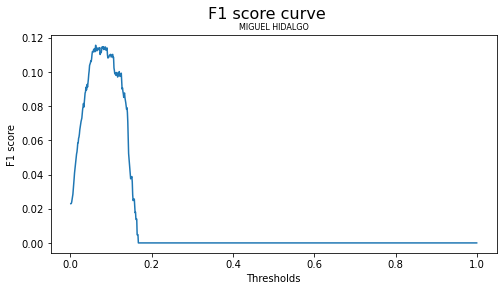

Results of Logistic Regression:

   F1 Score: 0.11567476948868399
   Accuracy: 0.9667034874546315
   Balanced Accuracy: 0.5816798783408372
   Average Precision Score: 0.0449726917027887


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     31317
           1       0.08      0.19      0.12       368

    accuracy                           0.97     31685
   macro avg       0.54      0.58      0.55     31685
weighted avg       0.98      0.97      0.97     31685

***************************


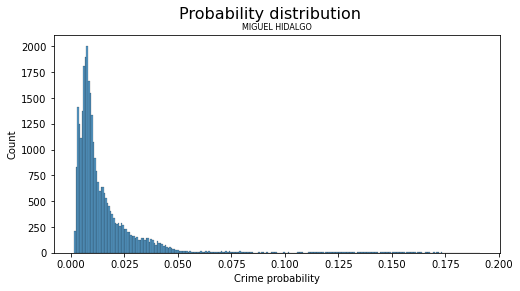

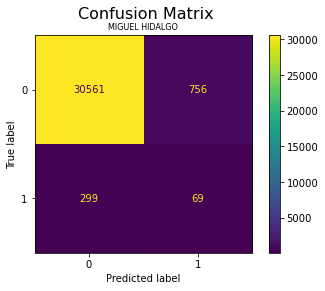

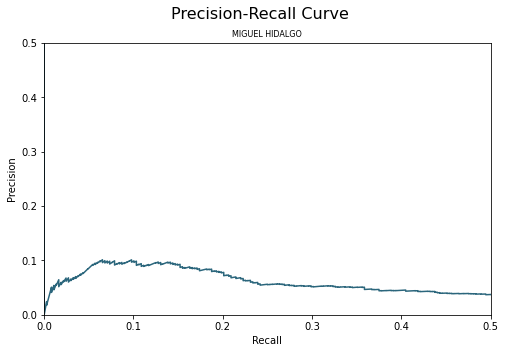

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|COYOACAN|


Total features:  196
Observations:  1115182


***TRAIN TABLE***
   Relative  Absolute
0  0.990592   1104690
1  0.009408     10492


***TEST TABLE***
   Relative  Absolute
0  0.993687     55091
1  0.006313       350
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 13.5min finished


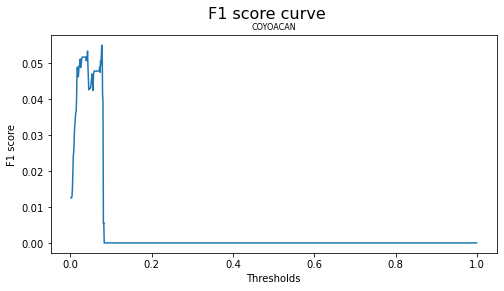

Results of Logistic Regression:

   F1 Score: 0.0550098231827112
   Accuracy: 0.9913241103154705
   Balanced Accuracy: 0.5186839955709643
   Average Precision Score: 0.023565490398414365


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     55091
           1       0.09      0.04      0.06       350

    accuracy                           0.99     55441
   macro avg       0.54      0.52      0.53     55441
weighted avg       0.99      0.99      0.99     55441

***************************


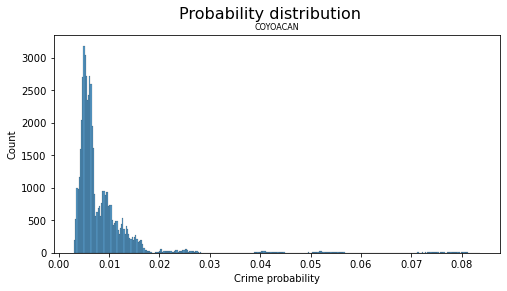

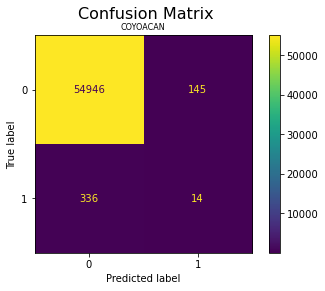

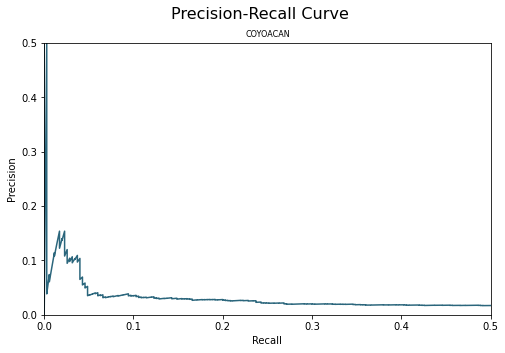

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|VENUSTIANO CARRANZA|


Total features:  123
Observations:  586864


***TRAIN TABLE***
   Relative  Absolute
0  0.979377    574761
1  0.020623     12103


***TEST TABLE***
   Relative  Absolute
0  0.986524     28771
1  0.013476       393
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.7min finished


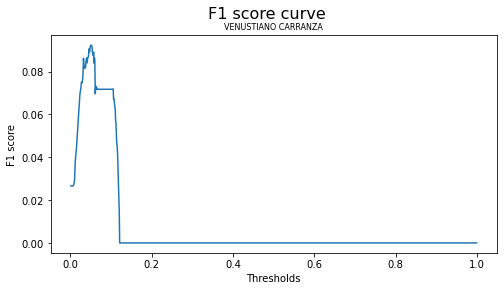

Results of Logistic Regression:

   F1 Score: 0.09226594301221165
   Accuracy: 0.9541215196817995
   Balanced Accuracy: 0.5689094625693475
   Average Precision Score: 0.04253736683378431


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     28771
           1       0.06      0.17      0.09       393

    accuracy                           0.95     29164
   macro avg       0.53      0.57      0.53     29164
weighted avg       0.98      0.95      0.96     29164

***************************


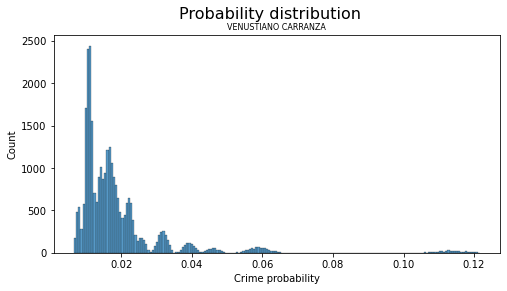

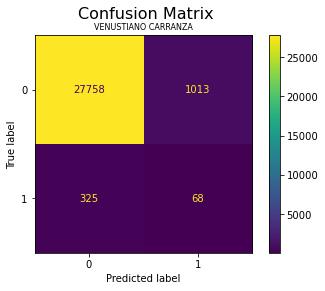

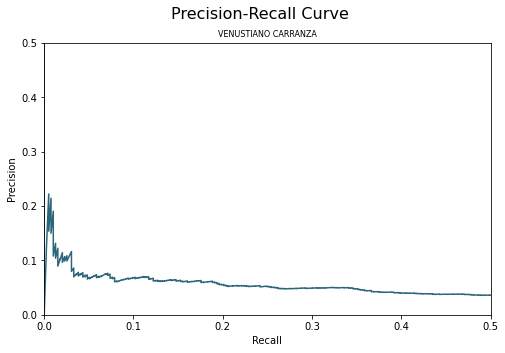

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|LA MAGDALENA CONTRERAS|


Total features:  94
Observations:  376495


***TRAIN TABLE***
   Relative  Absolute
0  0.994252    374331
1  0.005748      2164


***TEST TABLE***
   Relative  Absolute
0  0.994925     18625
1  0.005075        95
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.5min finished


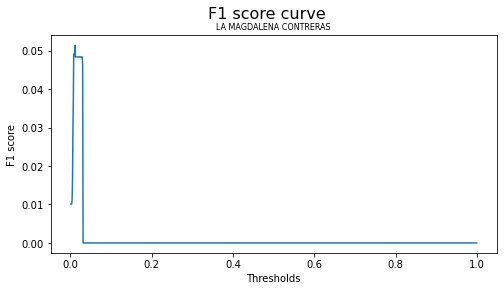

Results of Logistic Regression:

   F1 Score: 0.05139186295503212
   Accuracy: 0.9763354700854701
   Balanced Accuracy: 0.5534934652066408
   Average Precision Score: 0.016676319747372405


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18625
           1       0.03      0.13      0.05        95

    accuracy                           0.98     18720
   macro avg       0.51      0.55      0.52     18720
weighted avg       0.99      0.98      0.98     18720

***************************


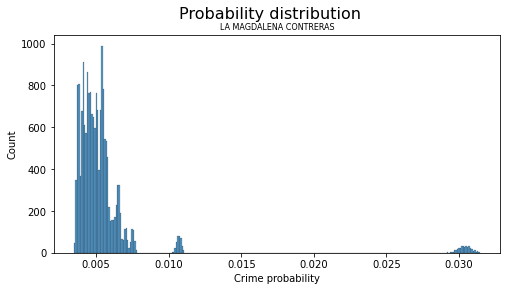

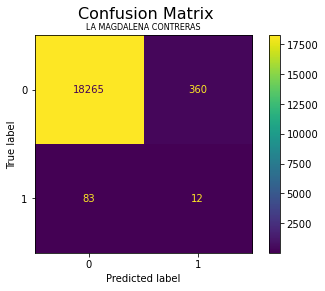

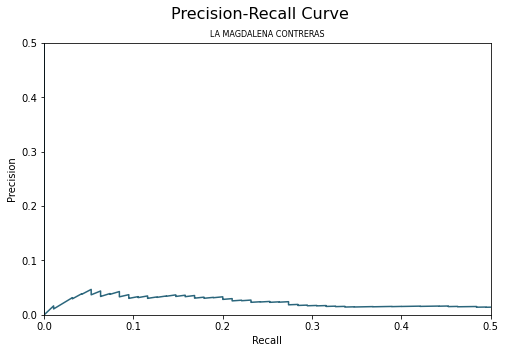

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|BENITO JUAREZ|


Total features:  106
Observations:  463677


***TRAIN TABLE***
   Relative  Absolute
0   0.97583    452470
1   0.02417     11207


***TEST TABLE***
   Relative  Absolute
0  0.985724     22716
1  0.014276       329
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished


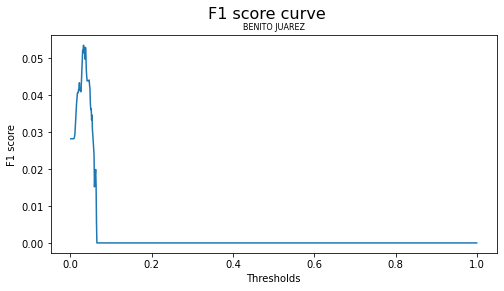

Results of Logistic Regression:

   F1 Score: 0.05342399222923749
   Accuracy: 0.9154263397700152
   Balanced Accuracy: 0.5467183394696292
   Average Precision Score: 0.023551804674697616


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     22716
           1       0.03      0.17      0.05       329

    accuracy                           0.92     23045
   macro avg       0.51      0.55      0.50     23045
weighted avg       0.97      0.92      0.94     23045

***************************


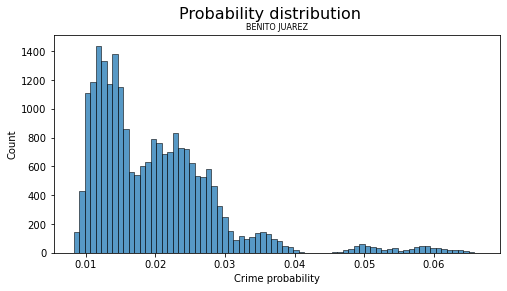

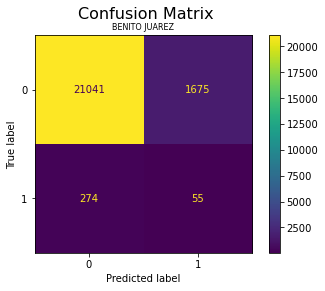

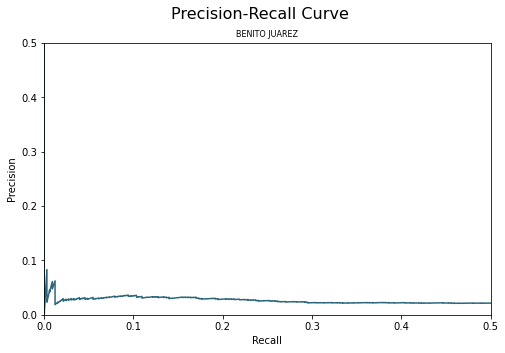

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|GUSTAVO A. MADERO|


Total features:  274
Observations:  1680123


***TRAIN TABLE***
   Relative  Absolute
0  0.987139   1658515
1  0.012861     21608


***TEST TABLE***
   Relative  Absolute
0  0.992051     82866
1  0.007949       664
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 21.6min finished


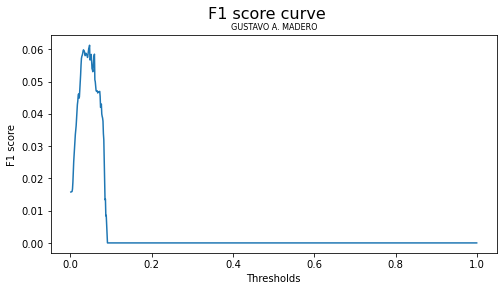

Results of Logistic Regression:

   F1 Score: 0.06125696101829754
   Accuracy: 0.9717466778402969
   Balanced Accuracy: 0.5472839333585156
   Average Precision Score: 0.02475932618328192


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     82866
           1       0.04      0.12      0.06       664

    accuracy                           0.97     83530
   macro avg       0.52      0.55      0.52     83530
weighted avg       0.99      0.97      0.98     83530

***************************


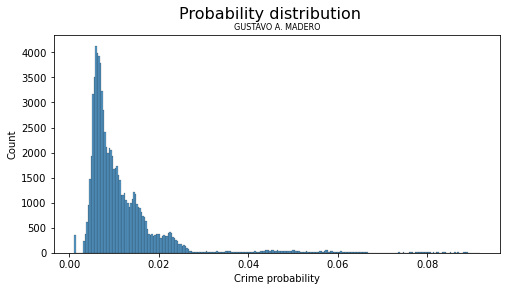

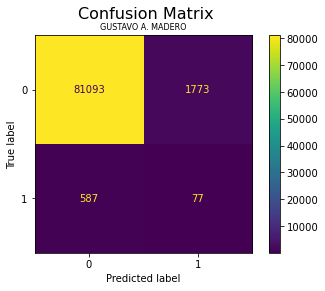

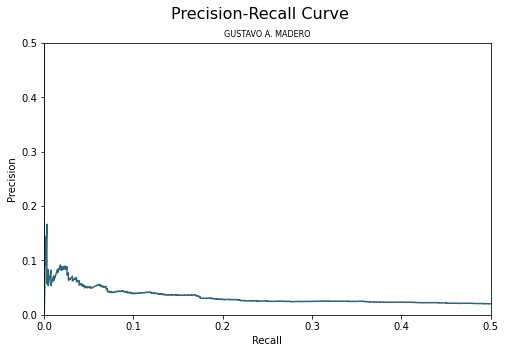

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|TLALPAN|


Total features:  219
Observations:  1281604


***TRAIN TABLE***
   Relative  Absolute
0   0.99284   1272428
1   0.00716      9176


***TEST TABLE***
   Relative  Absolute
0  0.994664     63382
1  0.005336       340
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 15.0min finished


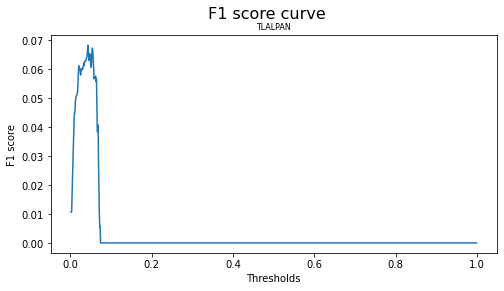

Results of Logistic Regression:

   F1 Score: 0.06822742474916388
   Accuracy: 0.9781394180973604
   Balanced Accuracy: 0.5662909027799691
   Average Precision Score: 0.026325105797041295


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     63382
           1       0.04      0.15      0.07       340

    accuracy                           0.98     63722
   macro avg       0.52      0.57      0.53     63722
weighted avg       0.99      0.98      0.98     63722

***************************


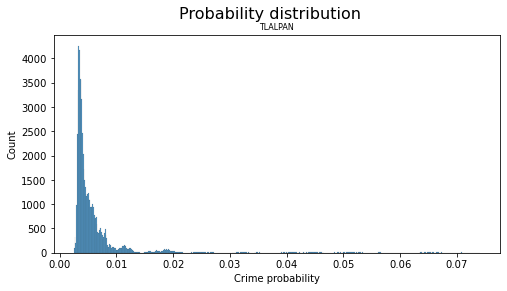

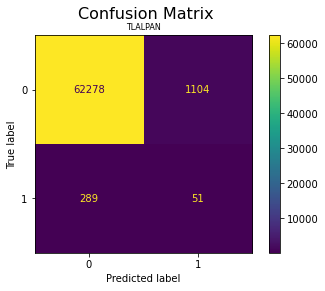

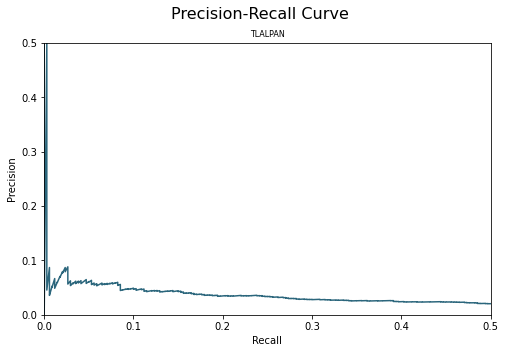

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|AZCAPOTZALCO|


Total features:  153
Observations:  803810


***TRAIN TABLE***
   Relative  Absolute
0  0.988329    794429
1  0.011671      9381


***TEST TABLE***
   Relative  Absolute
0  0.993119     39689
1  0.006881       275
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.3min finished


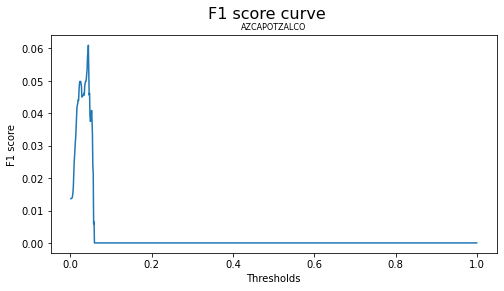

Results of Logistic Regression:

   F1 Score: 0.06100217864923748
   Accuracy: 0.9784305875287759
   Balanced Accuracy: 0.5431613522409461
   Average Precision Score: 0.01983154898844512


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     39689
           1       0.04      0.10      0.06       275

    accuracy                           0.98     39964
   macro avg       0.52      0.54      0.53     39964
weighted avg       0.99      0.98      0.98     39964

***************************


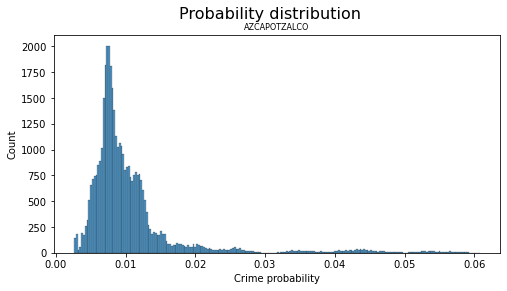

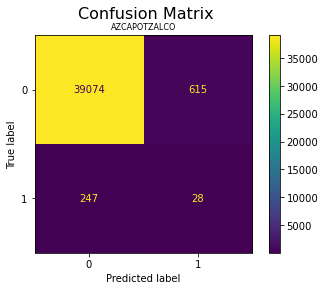

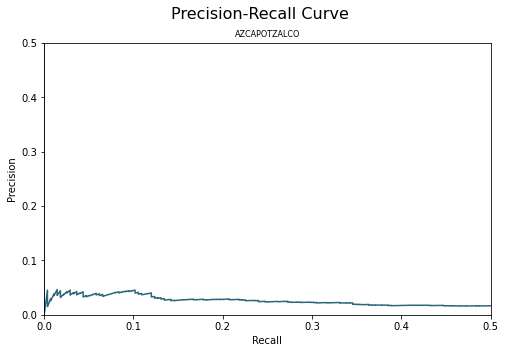

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|XOCHIMILCO|


Total features:  121
Observations:  572133


***TRAIN TABLE***
   Relative  Absolute
0  0.987859    565187
1  0.012141      6946


***TEST TABLE***
   Relative  Absolute
0  0.992617     28233
1  0.007383       210
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.6min finished


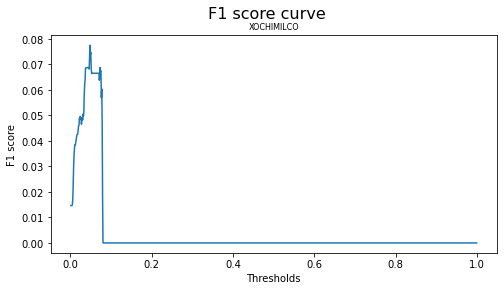

Results of Logistic Regression:

   F1 Score: 0.07754010695187165
   Accuracy: 0.9757409555954013
   Balanced Accuracy: 0.5600333449711836
   Average Precision Score: 0.03096019664553997


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     28233
           1       0.05      0.14      0.08       210

    accuracy                           0.98     28443
   macro avg       0.52      0.56      0.53     28443
weighted avg       0.99      0.98      0.98     28443

***************************


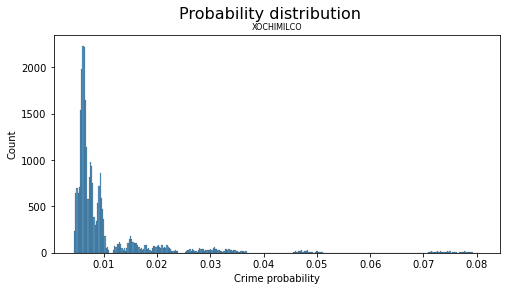

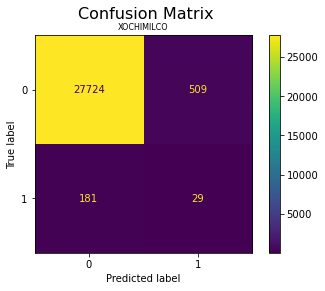

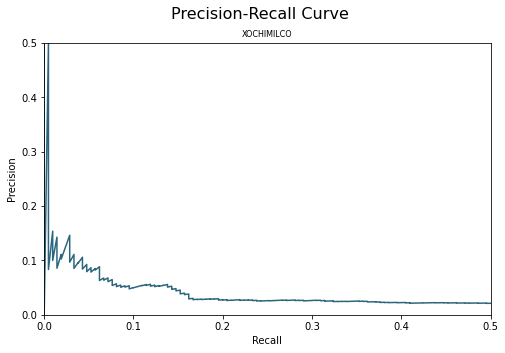

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|MILPA ALTA|


Total features:  53
Observations:  79656


***TRAIN TABLE***
   Relative  Absolute
0  0.989091     78787
1  0.010909       869


***TEST TABLE***
   Relative  Absolute
0  0.993687      3935
1  0.006313        25
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.9s finished


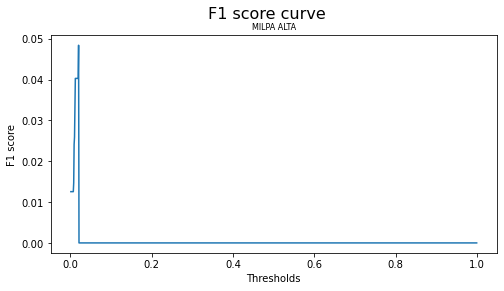

Results of Logistic Regression:

   F1 Score: 0.04838709677419355
   Accuracy: 0.851010101010101
   Balanced Accuracy: 0.726302414231258
   Average Precision Score: 0.07452198562070941


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3935
           1       0.03      0.60      0.05        25

    accuracy                           0.85      3960
   macro avg       0.51      0.73      0.48      3960
weighted avg       0.99      0.85      0.91      3960

***************************


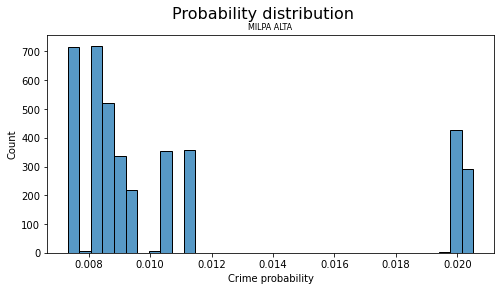

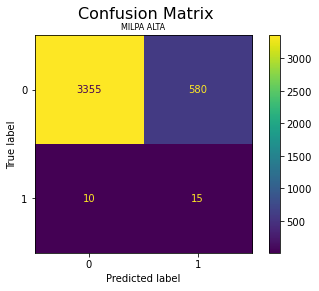

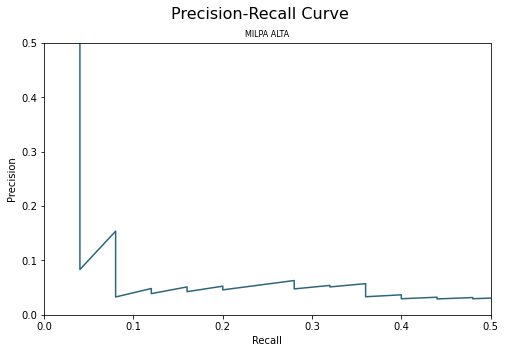

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|ALVARO OBREGON|


Total features:  292
Observations:  1810221


***TRAIN TABLE***
   Relative  Absolute
0    0.9931   1797730
1    0.0069     12491


***TEST TABLE***
   Relative  Absolute
0  0.995134     89568
1  0.004866       438
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 23.0min finished


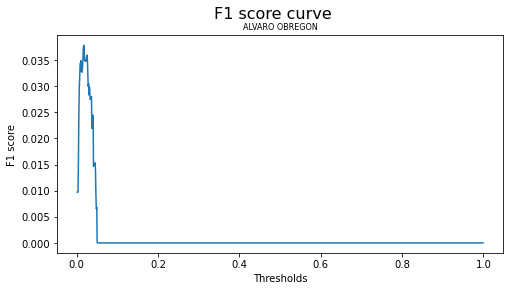

Results of Logistic Regression:

   F1 Score: 0.0378619153674833
   Accuracy: 0.9616025598293447
   Balanced Accuracy: 0.5603984360852947
   Average Precision Score: 0.01521106723682998


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     89568
           1       0.02      0.16      0.04       438

    accuracy                           0.96     90006
   macro avg       0.51      0.56      0.51     90006
weighted avg       0.99      0.96      0.98     90006

***************************


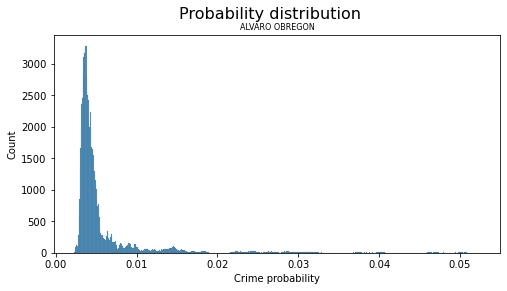

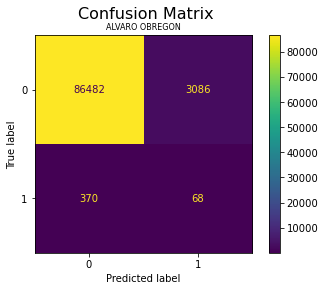

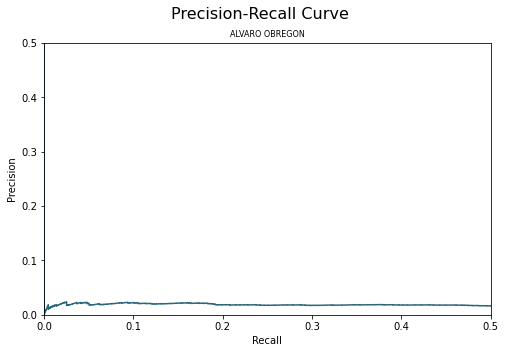

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|IZTACALCO|


Total features:  97
Observations:  398672


***TRAIN TABLE***
   Relative  Absolute
0  0.975456    388887
1  0.024544      9785


***TEST TABLE***
   Relative  Absolute
0  0.984094     19489
1  0.015906       315
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished


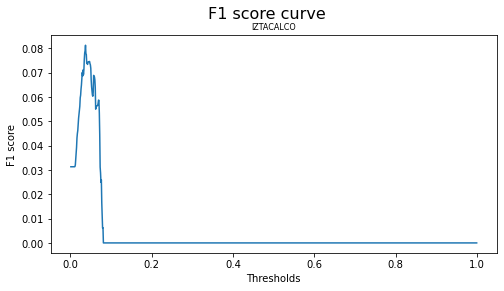

Results of Logistic Regression:

   F1 Score: 0.08127402526084569
   Accuracy: 0.9155221167440921
   Balanced Accuracy: 0.5807216443626726
   Average Precision Score: 0.03663348143191521


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     19489
           1       0.05      0.23      0.08       315

    accuracy                           0.92     19804
   macro avg       0.52      0.58      0.52     19804
weighted avg       0.97      0.92      0.94     19804

***************************


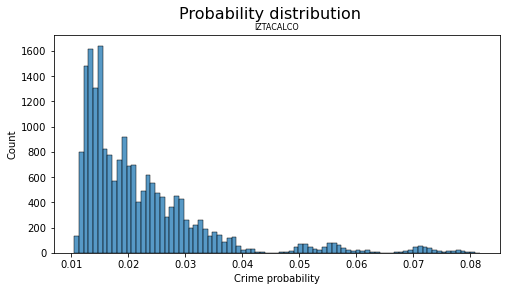

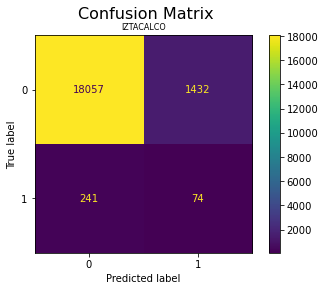

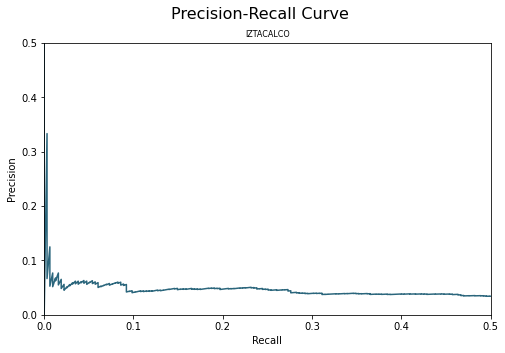

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|CUAUHTEMOC|


Total features:  105
Observations:  458607


***TRAIN TABLE***
   Relative  Absolute
0  0.946202    433935
1  0.053798     24672


***TEST TABLE***
   Relative  Absolute
0  0.973398     22101
1  0.026602       604
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min finished


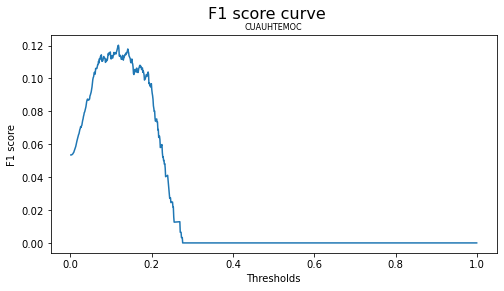

Results of Logistic Regression:

   F1 Score: 0.12016175621028306
   Accuracy: 0.9329222638185422
   Balanced Accuracy: 0.562948966080166
   Average Precision Score: 0.06507792407467755


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     22101
           1       0.09      0.17      0.12       604

    accuracy                           0.93     22705
   macro avg       0.53      0.56      0.54     22705
weighted avg       0.95      0.93      0.94     22705

***************************


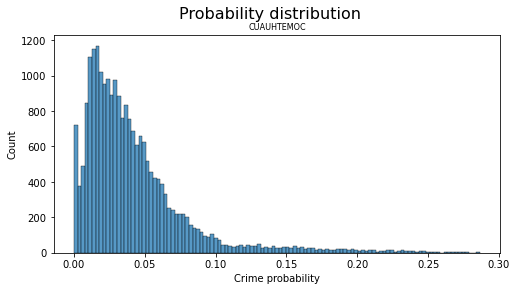

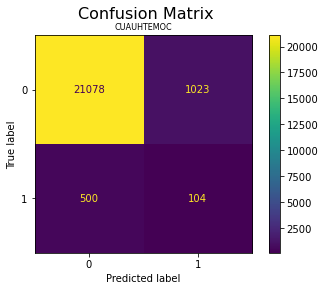

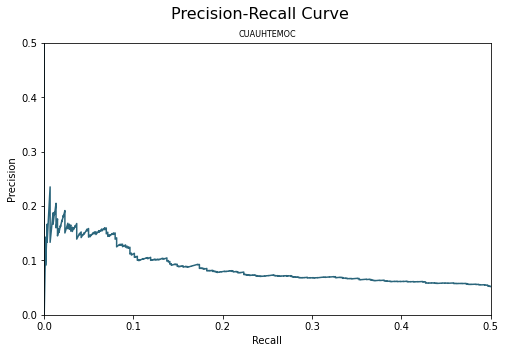

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|TLAHUAC|


Total features:  100
Observations:  420028


***TRAIN TABLE***
   Relative  Absolute
0  0.986708    414445
1  0.013292      5583


***TEST TABLE***
   Relative  Absolute
0   0.98918     20661
1   0.01082       226
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.0min finished


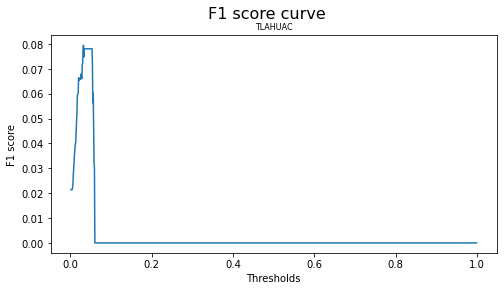

Results of Logistic Regression:

   F1 Score: 0.07952871870397644
   Accuracy: 0.9700770814382151
   Balanced Accuracy: 0.5494252349238208
   Average Precision Score: 0.03309037677148281


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     20661
           1       0.06      0.12      0.08       226

    accuracy                           0.97     20887
   macro avg       0.52      0.55      0.53     20887
weighted avg       0.98      0.97      0.97     20887

***************************


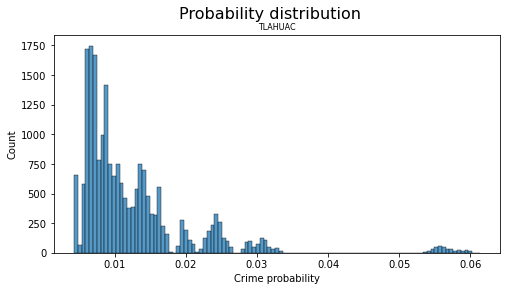

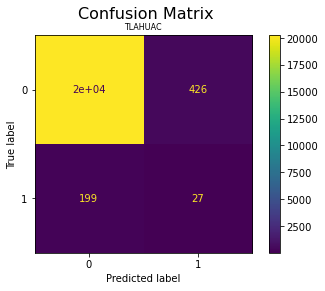

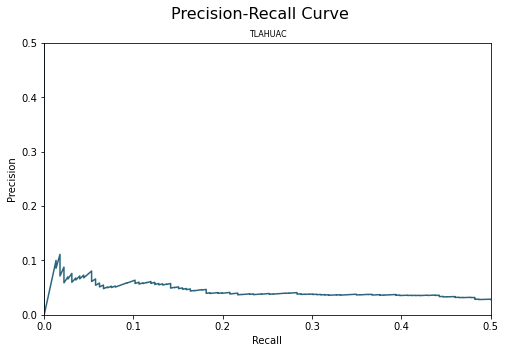

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|IZTAPALAPA|


Total features:  335
Observations:  2122273


***TRAIN TABLE***
   Relative  Absolute
0  0.982459   2085047
1  0.017541     37226


***TEST TABLE***
   Relative  Absolute
0  0.989052    104340
1  0.010948      1155
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 36.1min finished


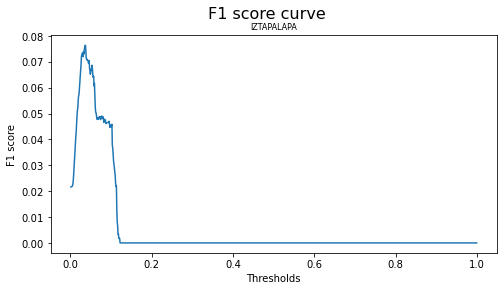

Results of Logistic Regression:

   F1 Score: 0.07639979068550498
   Accuracy: 0.949808047774776
   Balanced Accuracy: 0.5739167531720724
   Average Precision Score: 0.0345278799909481


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    104340
           1       0.05      0.19      0.08      1155

    accuracy                           0.95    105495
   macro avg       0.52      0.57      0.53    105495
weighted avg       0.98      0.95      0.96    105495

***************************


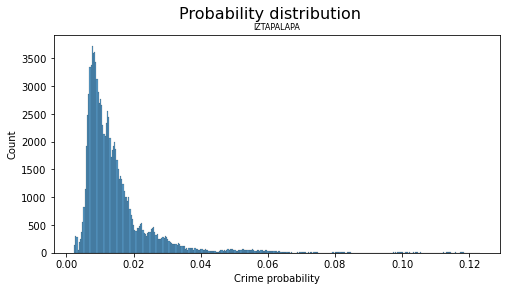

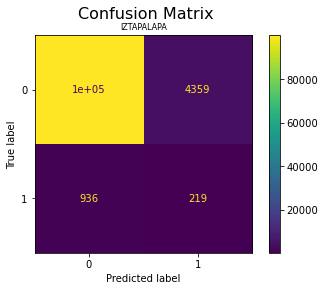

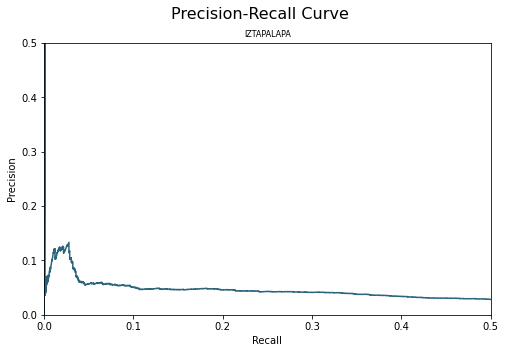

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|CUAJIMALPA DE MORELOS|


Total features:  85
Observations:  311334


***TRAIN TABLE***
   Relative  Absolute
0  0.995789    310023
1  0.004211      1311


***TEST TABLE***
   Relative  Absolute
0  0.997481     15441
1  0.002519        39
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min finished


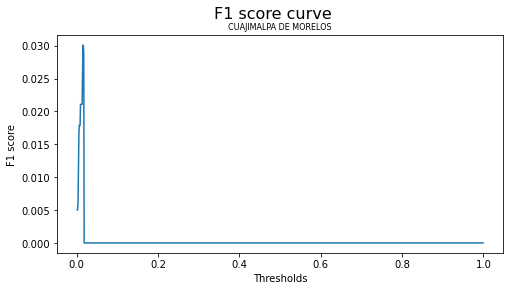

Results of Logistic Regression:

   F1 Score: 0.03007518796992481
   Accuracy: 0.975
   Balanced Accuracy: 0.5654600887746409
   Average Precision Score: 0.009043563563481495


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15441
           1       0.02      0.15      0.03        39

    accuracy                           0.97     15480
   macro avg       0.51      0.57      0.51     15480
weighted avg       1.00      0.97      0.98     15480

***************************


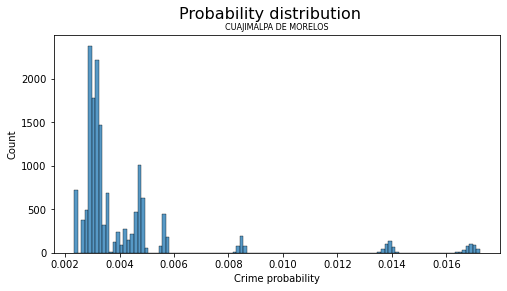

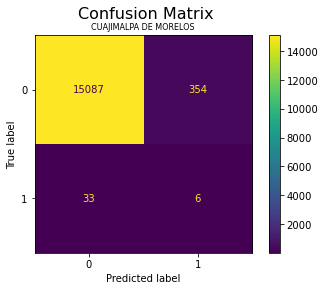

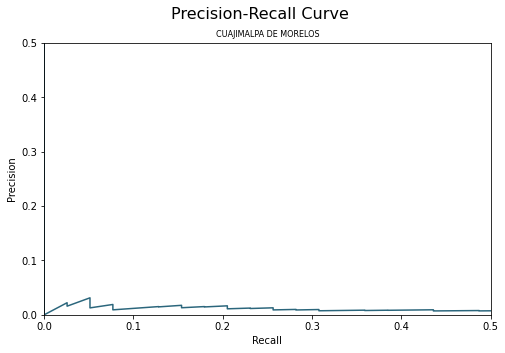

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------




In [7]:
## Loop for every Alcaldia (Municipality) and apply the model
alcaldias_list = colonias['alcaldi'].unique()

for alcaldia in alcaldias_list:
    
    ## Initialize the class model
    model = SplitTrainAndPredictLogistic(alcaldi=alcaldia, copy_df=matrix_crimes, colonias=colonias)

    ## Create tran-test splits
    X_train, X_test, y_train, y_test, save_columns, ind_test = model.train_test_df()

    ## Apply the model
    logistic, predictions, crime_prob, threshold = model.fit_my_results(X_train, X_test, y_train, y_test)

    ## Show and save scores
    save_scores_df = model.show_my_results(y_test, crime_prob, predictions, threshold, logistic, save_columns)

    ## Predict
    local_crimes_test = model.predict_crimes(X_test, ind_test, crime_prob, predictions, save_columns)

    ## Concat results
    results_logistic = pd.concat([results_logistic, local_crimes_test], ignore_index=True)
    all_scores = pd.concat([all_scores, save_scores_df], ignore_index=True)
    train_test_table = pd.concat([train_test_table, model.train_test_table], ignore_index=True)


In [8]:
if not os.path.isdir(create_path(r"df_results_logistic")):
    
    os.makedirs(create_path(r"df_results_logistic"))

## Save DataFrames results
results_logistic.to_csv(create_path(r"df_results_logistic\results_logistic.csv"), index=False)

all_scores.to_csv(create_path(r"df_results_logistic\all_scores_logistic.csv"), index=False)

train_test_table.to_csv(create_path(r"df_results_logistic\train_test_table_logistic.csv"), index=False)

## Finally, save a reduced form of the results DataFrame and Neighborhoods
reduced_results_logistic = results_logistic[['id_colonia', 'day_period', 'dia_semana', 'proba_crimen']]

reduced_results_logistic.to_csv(create_path(r"df_results_logistic\reduced_results_logistic.csv"), index=False)

reduced_colonias = colonias[['id_colonia', 'colonia', 'geometry']].copy()

reduced_colonias.to_csv(create_path(r"df_results_logistic\reduced_colonias.csv"), index=False)

In [9]:
results_logistic = pd.read_csv(create_path(r"df_results_logistic\results_logistic.csv"),low_memory=False,
                          parse_dates=['Hora'])

results_logistic['geometry'] = gpd.GeoSeries.from_wkt(results_logistic['geometry'])

results_logistic = gpd.GeoDataFrame(results_logistic, geometry='geometry')

Results of Logistic Regression:

   F1 Score: 0.07059186189889026
   Accuracy: 0.9630090284348923
   Balanced Accuracy: 0.5637498694024794
   Average Precision Score: 0.03295686413154752


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    646225
           1       0.05      0.16      0.07      5826

    accuracy                           0.96    652051
   macro avg       0.52      0.56      0.53    652051
weighted avg       0.98      0.96      0.97    652051

***************************


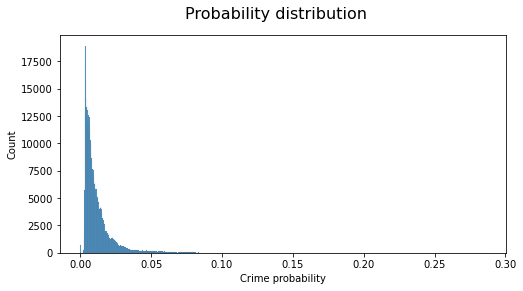

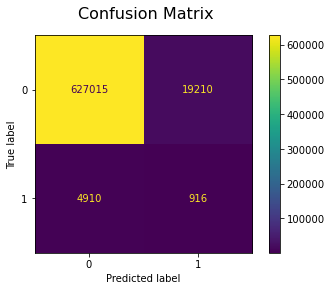

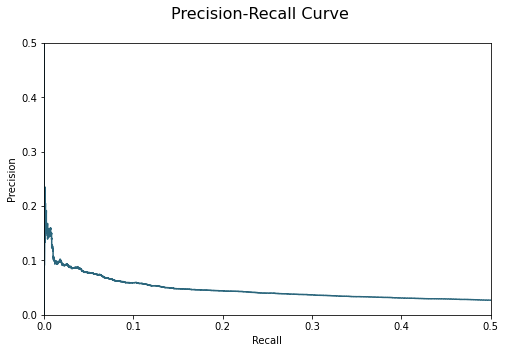

In [10]:
## Show aggregated results
model = SplitTrainAndPredictLogistic(copy_df=matrix_crimes, colonias=colonias, alcaldi="")


model.show_my_results(results_logistic['crimen'], results_logistic['proba_crimen'], results_logistic['predictions'],
                      return_res_df=False)

### Probability analysis

In [11]:
summary, results = rp.ttest(group1= results_logistic['proba_crimen'][results_logistic['crimen'] == 1], 
                            group1_name= "Crime",
                            group2= results_logistic['proba_crimen'][results_logistic['crimen'] == 0], 
                            group2_name= "Non-Crime")
#print(summary)


In [12]:
print(results)

                  Independent t-test      results
0  Difference (Crime - Non-Crime) =        0.0161
1              Degrees of freedom =   652049.0000
2                               t =       86.9557
3           Two side test p value =        0.0000
4          Difference < 0 p value =        1.0000
5          Difference > 0 p value =        0.0000
6                       Cohen's d =        1.1444
7                       Hedge's g =        1.1444
8                   Glass's delta =        0.5148
9                     Pearson's r =        0.1071


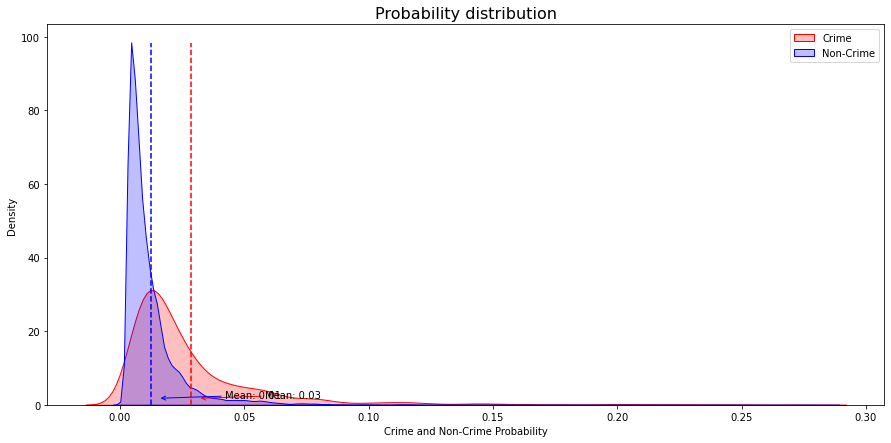

In [13]:
## Graficamos distribución kernel

fig = plt.figure(figsize=(15, 7))

ax = fig.subplots(1, 1)

a = sns.kdeplot(data=results_logistic['proba_crimen'][results_logistic['crimen'] == 1], shade=True, ax=ax,
               color='red')
b = sns.kdeplot(data=results_logistic['proba_crimen'][results_logistic['crimen'] == 0], shade=True, ax=ax,
               color='blue')       

plt.title('Probability distribution', fontdict={'fontsize': 16})

plt.xlabel('Crime and Non-Crime Probability')

plt.ylabel('Density')
plt.legend(labels=['Crime','Non-Crime'])

ax.axvline(x=results_logistic['proba_crimen'][results_logistic['crimen'] == 1].mean(), ymax=0.95, linestyle='--', color='red')
plt.annotate(
    'Mean: ' + '{:,.2f}'.format(results_logistic['proba_crimen'][results_logistic['crimen'] == 1].mean()),
    xy=(results_logistic['proba_crimen'][results_logistic['crimen'] == 1].mean(), 1.7),
    xytext=(results_logistic['proba_crimen'][results_logistic['crimen'] == 1].mean()+.03, 1.8),
    arrowprops=dict(arrowstyle='->', color='red', shrinkB=10))

ax.axvline(x=results_logistic['proba_crimen'][results_logistic['crimen'] == 0].mean(), ymax=0.95, linestyle='--', color='blue')

plt.annotate(
    'Mean: ' + '{:,.2f}'.format(results_logistic['proba_crimen'][results_logistic['crimen'] == 0].mean()),
    xy=(results_logistic['proba_crimen'][results_logistic['crimen'] == 0].mean(), 1.7),
    xytext=(results_logistic['proba_crimen'][results_logistic['crimen'] == 0].mean()+.03, 1.8),
    arrowprops=dict(arrowstyle='->', color='blue', shrinkB=10))

plt.show()

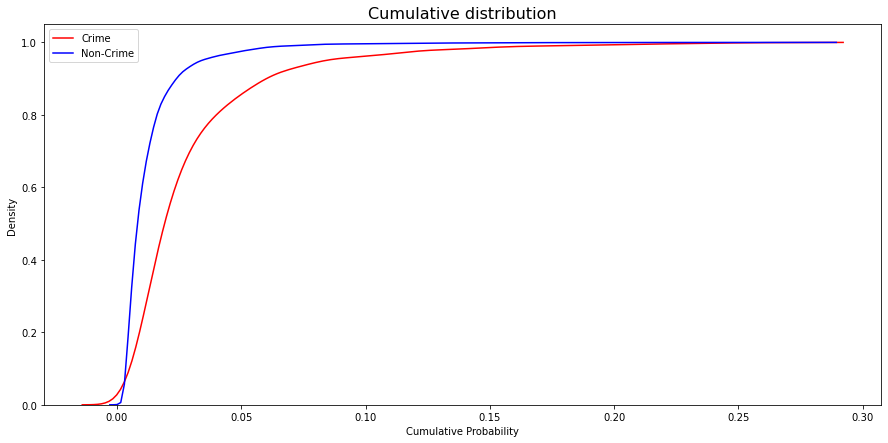

In [14]:
## Graficamos distribución kernel

fig = plt.figure(figsize=(15, 7))

ax = fig.subplots(1, 1)

a = sns.kdeplot(data=results_logistic['proba_crimen'][results_logistic['crimen'] == 1], ax=ax,
               color='red', cumulative=True)
b = sns.kdeplot(data=results_logistic['proba_crimen'][results_logistic['crimen'] == 0], ax=ax,
               color='blue', cumulative=True)       

plt.title('Cumulative distribution', fontdict={'fontsize': 16})

plt.xlabel('Cumulative Probability')

plt.ylabel('Density')
plt.legend(labels=['Crime','Non-Crime'])

plt.show()

In [15]:
results_logistic_agg = results_logistic.groupby(['id_colonia', 'colonia']).agg({'proba_crimen':['mean', 'median', 'std'], 
                                                                                'predictions':'mean',
                                                                                'crimen':'mean'}).reset_index()

results_logistic_agg.columns = ['_'.join(col).strip() for col in results_logistic_agg.columns.values]


In [16]:
results_logistic_agg.sort_values(by='proba_crimen_mean', ascending=False).head(10)

,id_colonia_,colonia_,proba_crimen_mean,proba_crimen_median,proba_crimen_std,predictions_mean,crimen_mean
1382,1384,CENTRO VIII,0.167734,0.174388,0.061113,0.733516,0.120879
1381,1383,CENTRO VI,0.151439,0.157135,0.055871,0.713889,0.100000
339,340,CENTRO IV,0.142262,0.147396,0.053000,0.701370,0.117808
849,850,TACUBA,0.123218,0.131677,0.038894,0.930748,0.083102
7,8,CENTRO II,0.113845,0.113865,0.003605,1.000000,0.075000
317,318,JUAREZ,0.110355,0.114000,0.042758,0.457300,0.090909
850,851,TACUBAYA,0.109410,0.116823,0.034978,0.836111,0.077778
215,216,PASEOS DE CHURUBUSCO,0.106697,0.105254,0.008258,1.000000,0.096953
932,933,GUERRERO III,0.093696,0.096516,0.036676,0.276243,0.049724
77,78,TABACALERA,0.082823,0.085280,0.032737,0.160665,0.044321


In [17]:
results_logistic.reset_index(level=0, inplace=True, drop=True)

results_logistic_recall = results_logistic[results_logistic['crimen'] == 1].copy()

results_logistic_recall = results_logistic_recall.groupby(
    results_logistic['Hora'].dt.date)[['predictions']].mean().reset_index()

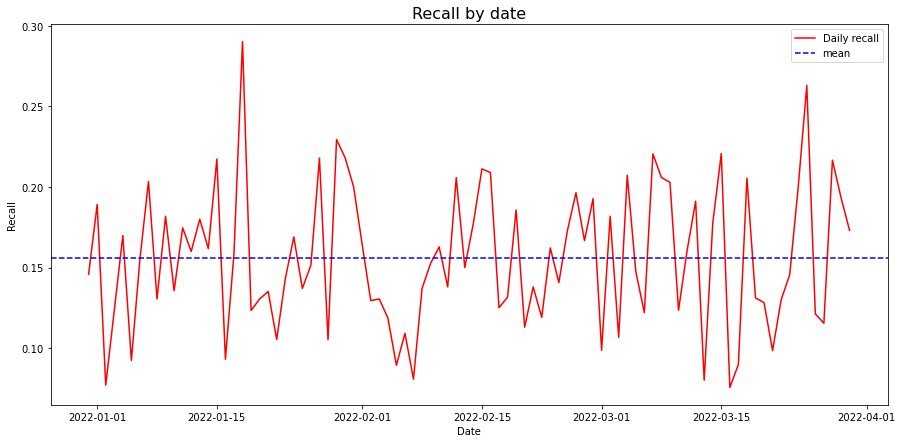

In [18]:
## Graficamos distribución kernel

fig = plt.figure(figsize=(15, 7))

ax = fig.subplots(1, 1)

a = sns.lineplot(data=results_logistic_recall, y='predictions', x='Hora', ax=ax,
               color='red')

plt.title('Recall by date', fontdict={'fontsize': 16})

plt.xlabel('Date')

ax.axhline(y=results_logistic_recall['predictions'].mean(), linestyle='--', color='blue')

plt.ylabel('Recall')
plt.legend(labels=['Daily recall', 'mean'])

plt.show()

In [19]:
results_logistic_recall.groupby(results_logistic['Hora'].dt.weekday)[['predictions']].mean().reset_index()

,Hora,predictions
0,0,0.171361
1,1,0.163874
2,2,0.135289
3,3,0.150743
4,4,0.170832
5,5,0.151741
6,6,0.144535


In [20]:
#https://www.analyticsvidhya.com/blog/2019/11/shapley-value-machine-learning-interpretability-game-theory/

#https://www.kaggle.com/prashant111/explain-your-model-predictions-with-shapley-values

#https://towardsdatascience.com/tagged/shapley-values

#https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html